In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_absolute_error


In [3]:
# Read excel file downloaded from 
# https://www.ons.gov.uk/economy/nationalaccounts/balanceofpayments/timeseries/erdm/mret
df = pd.read_excel('./excels/SouthKoreaExports.xlsx')

# This dataaset consists of monthly export values in millions of USD

In [8]:
# Parameters for walk-forward
forecast_horizon = 36  # months of out-of-sample forecasts
train_initial = len(df) - forecast_horizon  # initial training set
predictions = []

for i in range(forecast_horizon):
    train_set = df['Exports'].iloc[:train_initial + i]
    
    model = ARIMA(train_set, order=(1,1,1))
    model_fit = model.fit()
    
    # One-step forecast
    pred = model_fit.forecast(steps=1).iloc[0]
    predictions.append(pred)

# Compare predictions to actual
test_actuals = df['Exports'].iloc[train_initial:]
mae = mean_absolute_error(test_actuals, predictions)
print(f"Walk-forward MAE: {mae:.2f}")


Walk-forward MAE: 144.14


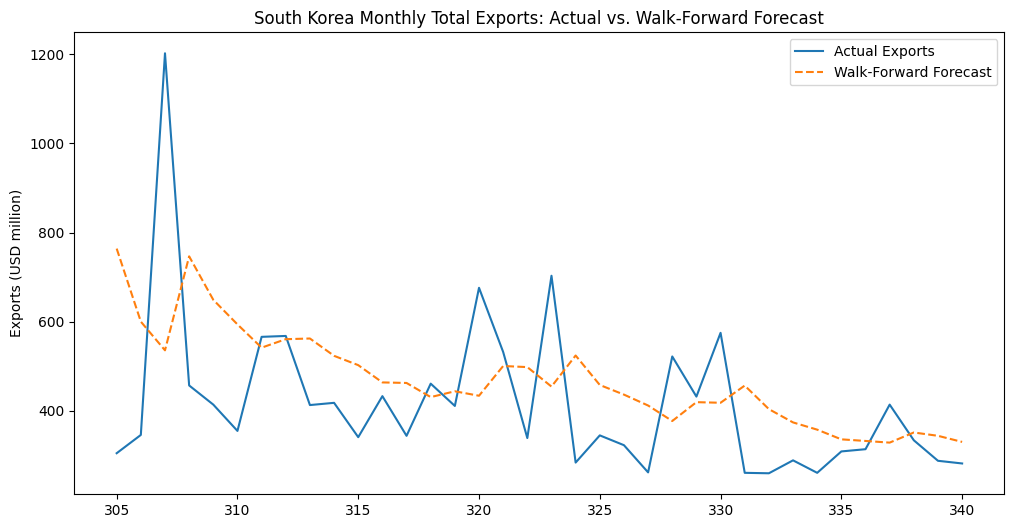

In [9]:
plt.figure(figsize=(12,6))
plt.plot(test_actuals.index, test_actuals, label='Actual Exports')
plt.plot(test_actuals.index, predictions, label='Walk-Forward Forecast', linestyle='--')
plt.title("South Korea Monthly Total Exports: Actual vs. Walk-Forward Forecast")
plt.ylabel("Exports (USD million)")
plt.legend()
plt.show()
